In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Dataset .csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
print(data.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [4]:
data = data.dropna()

In [5]:
data = data.drop_duplicates()

## We need to predict the aggretate rating of the restaurat based on above factors
### To DO:
### Drop the unnecessary columns
### Preprocess the data
### Seperate X and y
### Convert categorical to quantitative
### Build a regression model
### Evaluation metrics
### Type the key findings

In [6]:
data = data.drop(['Restaurant ID','Restaurant Name','Address',
                  'Locality','Locality Verbose','Longitude','Latitude','Rating color','Rating text','Cuisines'],axis=1)

In [7]:
data.head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,162,Makati City,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,314
1,162,Makati City,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,591
2,162,Mandaluyong City,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,270
3,162,Mandaluyong City,1500,Botswana Pula(P),No,No,No,No,4,4.9,365
4,162,Mandaluyong City,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,229


In [8]:
y = data['Aggregate rating']
X = data.drop('Aggregate rating',axis=1)

In [9]:
X.select_dtypes(include='object').columns

Index(['City', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu'],
      dtype='object')

In [10]:
print(X['Has Table booking'].value_counts())
print(X['Has Online delivery'].value_counts())
print(X['Is delivering now'].value_counts())
print(X['Switch to order menu'].value_counts())

No     8384
Yes    1158
Name: Has Table booking, dtype: int64
No     7091
Yes    2451
Name: Has Online delivery, dtype: int64
No     9508
Yes      34
Name: Is delivering now, dtype: int64
No    9542
Name: Switch to order menu, dtype: int64


## Since the column 'Switch to order menu has only one value no, so we can exclude that'
## Rest of the columns have binary values so we can use Label Encoder

In [11]:
X = X.drop('Switch to order menu',axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
X['Has Table booking'] = le.fit_transform(X['Has Table booking'])
X['Has Online delivery'] = le.fit_transform(X['Has Online delivery'])
X['Is delivering now'] = le.fit_transform(X['Is delivering now'])

In [14]:
X.head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes
0,162,Makati City,1100,Botswana Pula(P),1,0,0,3,314
1,162,Makati City,1200,Botswana Pula(P),1,0,0,3,591
2,162,Mandaluyong City,4000,Botswana Pula(P),1,0,0,4,270
3,162,Mandaluyong City,1500,Botswana Pula(P),0,0,0,4,365
4,162,Mandaluyong City,1500,Botswana Pula(P),1,0,0,4,229


### The other columns City and Currency can be encoded using get_dummies and Label Encoding, since our model is not prone for any ordinal relations we can use Label Encoding

In [15]:
le1 = LabelEncoder()
le1.fit(X['City'])
X['City'] = le1.transform(X[['City']])
category_mapping = dict(zip(le1.classes_, le1.transform(le1.classes_)))
print("Category to Number Mapping:")
print(category_mapping)

Category to Number Mapping:
{'Abu Dhabi': 0, 'Agra': 1, 'Ahmedabad': 2, 'Albany': 3, 'Allahabad': 4, 'Amritsar': 5, 'Ankara': 6, 'Armidale': 7, 'Athens': 8, 'Auckland': 9, 'Augusta': 10, 'Aurangabad': 11, 'Balingup': 12, 'Bandung': 13, 'Bangalore': 14, 'Beechworth': 15, 'Bhopal': 16, 'Bhubaneshwar': 17, 'Birmingham': 18, 'Bogor': 19, 'Boise': 20, 'Bras�_lia': 21, 'Cape Town': 22, 'Cedar Rapids/Iowa City': 23, 'Chandigarh': 24, 'Chatham-Kent': 25, 'Chennai': 26, 'Clatskanie': 27, 'Cochrane': 28, 'Coimbatore': 29, 'Colombo': 30, 'Columbus': 31, 'Consort': 32, 'Dalton': 33, 'Davenport': 34, 'Dehradun': 35, 'Des Moines': 36, 'Dicky Beach': 37, 'Doha': 38, 'Dubai': 39, 'Dubuque': 40, 'East Ballina': 41, 'Edinburgh': 42, 'Faridabad': 43, 'Fernley': 44, 'Flaxton': 45, 'Forrest': 46, 'Gainesville': 47, 'Ghaziabad': 48, 'Goa': 49, 'Gurgaon': 50, 'Guwahati': 51, 'Hepburn Springs': 52, 'Huskisson': 53, 'Hyderabad': 54, 'Indore': 55, 'Inner City': 56, 'Inverloch': 57, 'Jaipur': 58, 'Jakarta': 59, 

D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
X['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  473
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

In [17]:
X['Currency'] = le.fit_transform(X['Currency'])
X['Currency'].value_counts()

4     8652
2      473
7       80
1       60
3       60
9       60
6       40
11      34
0       22
5       21
8       20
10      20
Name: Currency, dtype: int64

In [18]:
X.head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes
0,162,73,1100,0,1,0,0,3,314
1,162,73,1200,0,1,0,0,3,591
2,162,75,4000,0,1,0,0,4,270
3,162,75,1500,0,0,0,0,4,365
4,162,75,1500,0,1,0,0,4,229


###  Now for observing the correlations among the data we generate a heatmap of correlations

In [20]:
df = pd.concat([X,y],axis=1)

In [21]:
df.head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,Aggregate rating
0,162,73,1100,0,1,0,0,3,314,4.8
1,162,73,1200,0,1,0,0,3,591,4.5
2,162,75,4000,0,1,0,0,4,270,4.4
3,162,75,1500,0,0,0,0,4,365,4.9
4,162,75,1500,0,1,0,0,4,229,4.8


In [22]:
corr = df.corr()

In [23]:
import seaborn as sns

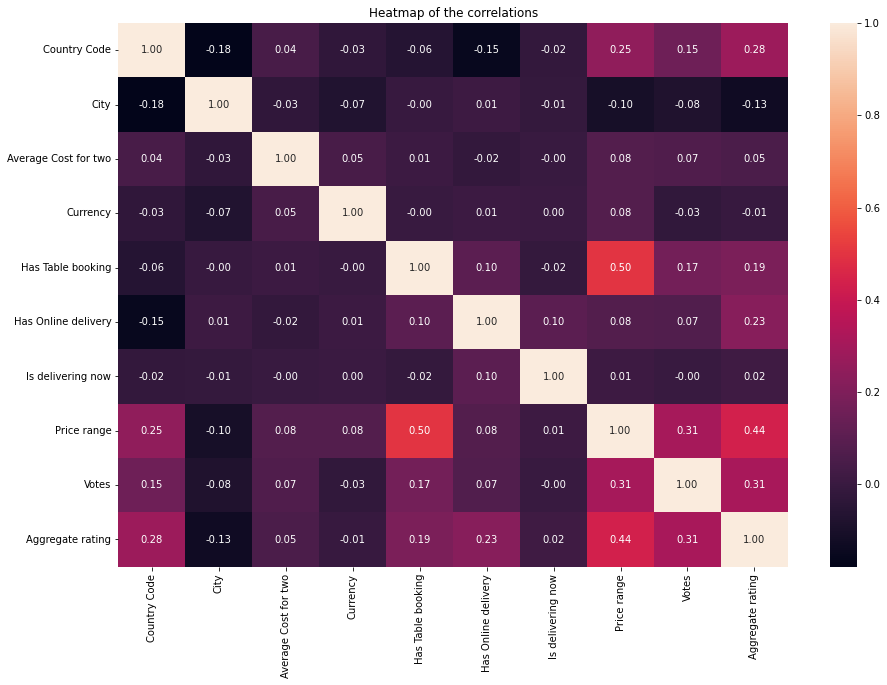

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='')
plt.title('Heatmap of the correlations')
plt.show()

from the above map we can see that:

1) Has Table booking column has the 50% positive correlation with the aggregate rating and, we can see it as the major influence    on the rating. So we can say that if a restaurant has table booking it has good rating.


2) After that the price range has 44 % positive correlation with the rating, if a restaurant has good price range it has good      rating.


3) Has online delivery has 23% correlation with the rating.


4) The specific country code has also significant effect on the rating.

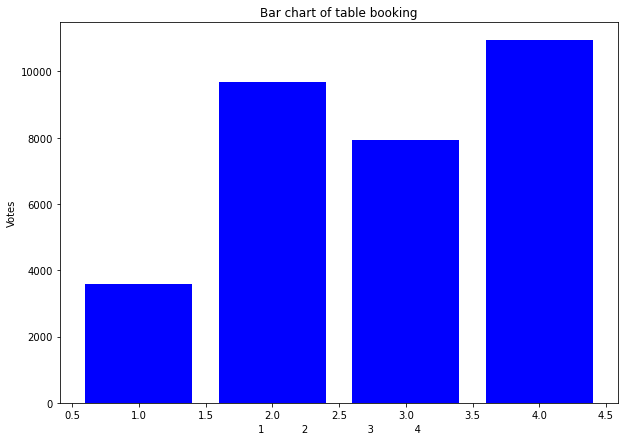

In [32]:
plt.figure(figsize=(10,7))
plt.bar(df['Price range'],df['Votes'],color='blue')
plt.xlabel('1            2                   3             4')
plt.ylabel('Votes')
plt.title('Bar chart of table booking')
plt.show()

### Splitting the data into training and testing

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Building the regression models

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.2919186558495993

In [40]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9199387791330189

In [41]:
rf = RandomForestRegressor(n_estimators= 250)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9477131519557705

### Since RandomForestModel gave us the best results we consider that

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
y_pred = rf.predict(X_test)

In [44]:
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

In [45]:
print(f'The mean squared error for the random forest model is {mse}')
print(f'The r2 score for the model is {r2}')

The mean squared error for the random forest model is 0.11639936008762936
The r2 score for the model is 0.9462609313864524
